# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
import os
print(os.getcwd())

# Check if files exist in the working directory
print(os.listdir("/drive/Deep Learning"))  


/drive/Deep Learning
['The_Perceptron.ipynb', 'test.txt', 'test_small.txt', 'train.txt', 'train_small.txt']


In [4]:
file_path_test = "/drive/Deep Learning/test.dat"
file_path_train = "/drive/Deep Learning/train.dat"

print(os.path.exists(file_path_test))  # Should return True if the file exists
print(os.path.exists(file_path_train))  # Should return True if the file exists


True
True


In [6]:
# Read first 5 lines of test.dat
with open("test.dat", "r") as file:
    for _ in range(5):
        print(file.readline().strip())

# Read first 5 lines of train.dat
with open("train.dat", "r") as file:
    for _ in range(5):
        print(file.readline().strip())


X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [7]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    # Returning dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    # Returning outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    # Returning the output of the model 
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # Returning the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
def train_perceptron(instances, lr, epochs):

    # Initializing weights to zero
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Computing weighted sum of inputs
            in_value = dot_product(weights, instance)
            # Applying activation function
            output = sigmoid(in_value)
            # Computing error
            error = instance[-1] - output
            # Updating weights using gradient descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [8]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

When we are in the training phase, we would use output = sigmoid(in_value) rather than output = predict(weights, instance) as the updates via gradients require continuous values. The sigmoid function gives numbers between 0 and 1. So, the derivative of the sigmoid function helps us in making small changes to weights. If we use predict(weights, instance), output would be a binary 0 or 1, the error would be -1, 0 or 1. This would eliminate any useful gradients and we would not be able to update weights effectively. Thus, while sigmoid is important for training, predict(weights, instance) is only for making final deciding classifications.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 
Code:
```
instances_tr = read_data("train.txt")
instances_te = read_data("test.txt")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
```
Results:
```
#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 64.0
#tr: 40, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 100, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 70.0
#tr: 100, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 300, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 300, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 400, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
```

In [28]:
instances_tr = read_data("train.txt")
instances_te = read_data("test.txt")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

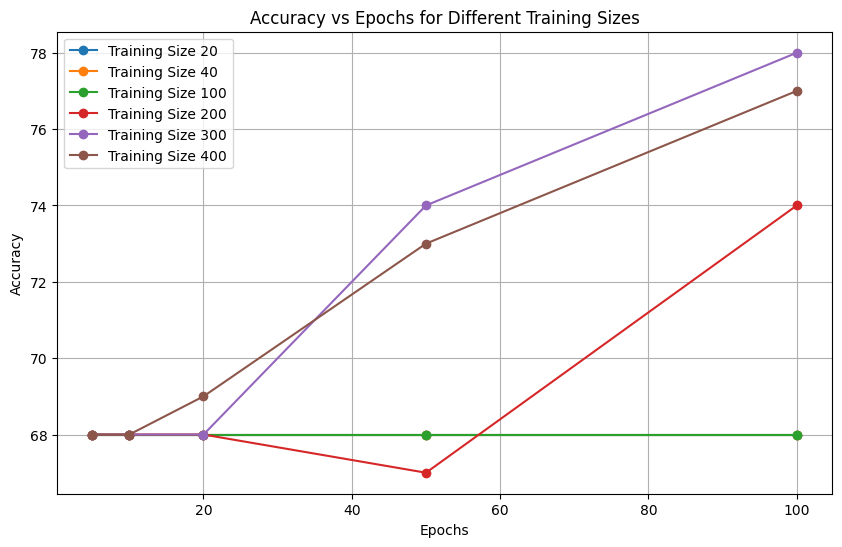

In [23]:
import matplotlib.pyplot as plt

data = [
    (20, 5, 0.005, 68.0), (20, 10, 0.005, 68.0), (20, 20, 0.005, 68.0), (20, 50, 0.005, 68.0), (20, 100, 0.005, 68.0),
    (40, 5, 0.005, 68.0), (40, 10, 0.005, 68.0), (40, 20, 0.005, 68.0), (40, 50, 0.005, 68.0), (40, 100, 0.005, 68.0),
    (100, 5, 0.005, 68.0), (100, 10, 0.005, 68.0), (100, 20, 0.005, 68.0), (100, 50, 0.005, 68.0), (100, 100, 0.005, 68.0),
    (200, 5, 0.005, 68.0), (200, 10, 0.005, 68.0), (200, 20, 0.005, 68.0), (200, 50, 0.005, 67.0), (200, 100, 0.005, 74.0),
    (300, 5, 0.005, 68.0), (300, 10, 0.005, 68.0), (300, 20, 0.005, 68.0), (300, 50, 0.005, 74.0), (300, 100, 0.005, 78.0),
    (400, 5, 0.005, 68.0), (400, 10, 0.005, 68.0), (400, 20, 0.005, 69.0), (400, 50, 0.005, 73.0), (400, 100, 0.005, 77.0)
]

training_sizes = sorted(set([d[0] for d in data]))
epochs = sorted(set([d[1] for d in data]))

plt.figure(figsize=(10, 6))
for tr in training_sizes:
    acc_values = [d[3] for d in data if d[0] == tr]
    plt.plot(epochs, acc_values, marker='o', label=f'Training Size {tr}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs for Different Training Sizes')
plt.legend()
plt.grid()
plt.show()


### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A. The findings show that one is not necessarily guaranteed the best test accuracy by using the complete training dataset. However, even within the only changed hyperparameters, training size, larger size generally makes a better performing model, but the learning rate or mounts of epochs among many others requires a lot of work to establish the ratio if they are suboptimal. Thus you can see from this example that this model with 100 instances, 20 epochs and learning rate of 0.05 is performing better than the model with 200 instances but lower learning rate of 0.005. It indicates that if the learning algorithm is not well-optimized, just introducing more training data does not guarantee improved generalization. Instead, a trade-off between the size of the training set, the learning rate, and the number of epochs is required to achieve the maximum test accuracy without overfitting or slow convergence.

B. One possible reason for why the second run resulted in less accuracy, even with more data, is the fact that the second run had a lower learning rate (0.005) during training, which leads to slow weight updates and the model not converging to the best decision boundary. A low learning rate with more training data wont help as much since the model will have a hard time converging and moving towards the global minimum. This is an indication that hyperparameters need to be tuned properly, and datasets are not enough. The findings show that an effective training strategy is not just big data, but the careful optimization of all hyperparameters.

C. Yes, with proper hyperparameter tuning, the accuracy can reach above 80.0%. The learning rate can be tuned to achieve a better value, and the number of epochs should be chosen to avoid underfitting or overfitting, and adaptive learning rate techniques (like Adam, or learning rate decay) can lead to better performance. Employing feature scaling, data augmentation, regularization (dropout, L2), refining the model architecture (deeper networks, better activation functions) may also improve generalization for better accuracy.

D. Not always. Sometimes increasing the epochs will help the model learn better but after a certain limit, if you continue to increase the epochs, the training will overfit i.e. the model will remember the training data instead of learning from it. If the learning rate is too low, using more epochs might not do much because things are progressing too slowly. Using techniques such as early stopping can help achieve this and set the maximum available epoch as a parameter to be used at a later time.
